# **Trees**

Pada part-part sebelumnya kita telah belajar mengenai menyimpanan data secara linear, seperti hasing, stack, queue dan linked list. Pada video kali ini kita akan mempelajari Tree yang memiliki cara penyimpanan data non-linear melainkan secara hierarki.

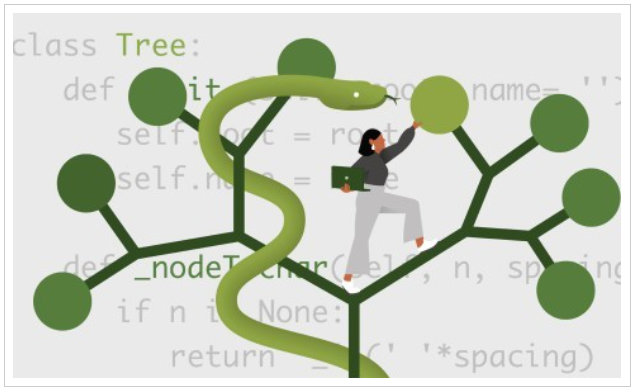

Bagaimana maksudnya? Untuk mempermudahnya kita bayangkan saja susunan keluarga yang kita miliki. Jika diperhatikan dalam susunan tersebut kita akan menemukan siapa kakek kita, orang tua kita, saudara orang tua atau paman kita, sepepupu kita, saudara kita, atau bahkan cucu kita bukan? Begitulah kira - kira penggambarannya dari pengertian Tree penyimpanan data secara hierarki yang tersusun secara urut dari kakek hingga cucu. Berikut atribut - atribut yang terdapat dalam Tree :

1. Node: Serupa dengan simpul, node merupakan kerangka dasar dari sebuah tree (pohon), kadang disebut sebagai "key". Sebuah node dapat mengandung informasi tambahan (atau payload), meskipun informasi dalam node ini tidak wajib tetapi sangat penting dalam implementasi struktur data tree.
2. Edge: Garis penghubung antara dua buah node yang menunjukkan adanya relasi (hubungan) diantara kedua node. Setiap node (kecuali node root) terhubung dengan satu penguhubung yang menuju ke dalam node dan beberapa penghubung yang mengarah keluar dari node.
3. Root: Satu-datunya node dalam tree yang tidak memiliki garis penghubung (edge) yang mengarah ke dalam root, edge yang menghubungkan root semua mengarah ke luar dari node. (cikal-bakal)
4. Path: Jalur yang menghubungkan antara satu node dengan node yang lain, dapat dterdiri dari beberapa node dan edge yang berkesinambungan.
5. Children: Node yang terhubung dengan edge yang mengarah ke dalam node disebut children (selalu memiliki parent)
6. Parent: Node yang terhubung dengan edge yang mengarah keluar (memiliki anak).
7. Sibling: Node-node yang memiliki parent yang sama.
8. Subtree: Sekelompok node beserta turunnanya (anak-anaknya).
9. Sebuah node yang tidak memiliki children (anak)

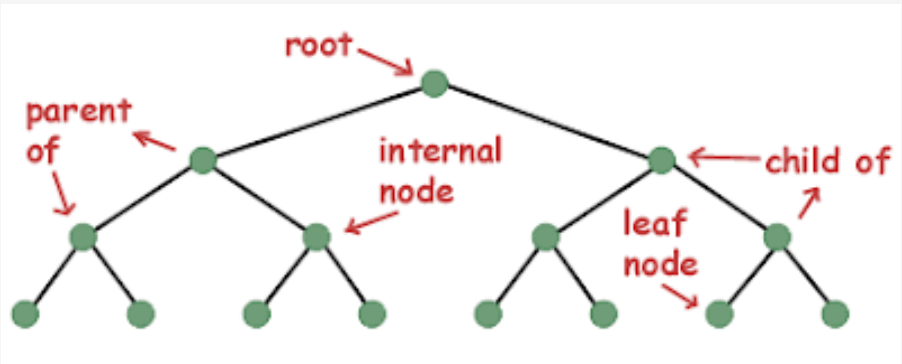

Tree adalah salah satu struktur data yang sering digunakan dalam ilmu komputer. Tree terdiri dari node-node yang dihubungkan oleh edges. Tree memiliki satu node utama yang disebut root (akar) dan setiap node bisa memiliki beberapa anak. Salah satu jenis tree yang paling umum adalah binary tree (tree biner), di mana setiap node memiliki maksimal dua anak yang disebut left child (anak kiri) dan right child (anak kanan).

## Mengapa Menggunakan Tree?
Tree digunakan untuk merepresentasikan data hierarkis dan hubungan antara data. Beberapa contoh penggunaan tree adalah:
* Struktur folder di komputer.
* Representasi ekspresi matematika.
* Struktur organisasi perusahaan.
* Algoritma pencarian, seperti Binary Search Tree (BST).

## Abstract Tree

Untuk membuat implementasi tree lebih fleksibel dan terorganisir, kita sering memulai dengan mendefinisikan Abstract Tree (tree abstrak). Tree abstrak adalah template dasar yang mendefinisikan metode-metode umum yang harus diimplementasikan oleh berbagai jenis tree. Ini membantu dalam menyusun struktur dan fungsionalitas tree dengan cara yang lebih terstruktur.

Berikut adalah contoh implementasi dari abstract tree dalam Python:

In [6]:
class Tree:
    """Kelas dasar abstrak yang merepresentasikan struktur tree."""

    class Position:
        """Abstraksi yang merepresentasikan lokasi elemen tunggal."""

        def element(self):
            """Mengembalikan elemen yang disimpan di posisi ini."""
            raise NotImplementedError('harus diimplementasikan oleh subclass')

        def __eq__(self, other):
            """Mengembalikan True jika posisi lain merepresentasikan lokasi yang sama."""
            raise NotImplementedError('harus diimplementasikan oleh subclass')

        def __ne__(self, other):
            """Mengembalikan True jika posisi lain tidak merepresentasikan lokasi yang sama."""
            return not (self == other)

    def root(self):
        """Mengembalikan posisi root dari tree (atau None jika tree kosong)."""
        raise NotImplementedError('harus diimplementasikan oleh subclass')

    def parent(self, p):
        """Mengembalikan posisi dari parent p (atau None jika p adalah root)."""
        raise NotImplementedError('harus diimplementasikan oleh subclass')

    def num_children(self, p):
        """Mengembalikan jumlah anak dari posisi p."""
        raise NotImplementedError('harus diimplementasikan oleh subclass')

    def children(self, p):
        """Menghasilkan iterasi dari posisi yang merepresentasikan anak-anak dari p."""
        raise NotImplementedError('harus diimplementasikan oleh subclass')

    def __len__(self):
        """Mengembalikan jumlah total elemen dalam tree."""
        raise NotImplementedError('harus diimplementasikan oleh subclass')

    def is_root(self, p):
        """Mengembalikan True jika posisi p adalah root dari tree."""
        return self.root() == p

    def is_leaf(self, p):
        """Mengembalikan True jika posisi p tidak memiliki anak."""
        return self.num_children(p) == 0

    def is_empty(self):
        """Mengembalikan True jika tree kosong."""
        return len(self) == 0


## Binary Tree
Binary Tree (tree biner) adalah jenis tree di mana setiap node memiliki maksimal dua anak. Tree biner digunakan untuk berbagai keperluan, termasuk pencarian dan pengurutan data.

Berikut adalah contoh implementasi binary tree dalam Python:

In [7]:
class BinaryTree(Tree):
    """Kelas dasar abstrak yang merepresentasikan struktur tree biner."""

    def left(self, p):
        """Mengembalikan posisi anak kiri dari p (atau None jika tidak ada anak kiri)."""
        raise NotImplementedError('harus diimplementasikan oleh subclass')

    def right(self, p):
        """Mengembalikan posisi anak kanan dari p (atau None jika tidak ada anak kanan)."""
        raise NotImplementedError('harus diimplementasikan oleh subclass')

    def sibling(self, p):
        """Mengembalikan posisi saudara dari p (atau None jika tidak ada saudara)."""
        parent = self.parent(p)
        if parent is None:
            return None
        else:
            if p == self.left(parent):
                return self.right(parent)
            else:
                return self.left(parent)

    def children(self, p):
        """Menghasilkan iterasi dari posisi yang merepresentasikan anak-anak dari p."""
        if self.left(p) is not None:
            yield self.left(p)
        if self.right(p) is not None:
            yield self.right(p)


## Implementasi Linked Binary Tree
Sekarang kita akan melihat bagaimana mengimplementasikan tree biner menggunakan linked list.

In [8]:
class LinkedBinaryTree(BinaryTree):
    """Representasi linked dari struktur tree biner."""

    class _Node:
        __slots__ = '_element', '_parent', '_left', '_right'

        def __init__(self, element, parent=None, left=None, right=None):
            self._element = element
            self._parent = parent
            self._left = left
            self._right = right

    class Position(BinaryTree.Position):
        """Abstraksi yang merepresentasikan lokasi elemen tunggal."""

        def __init__(self, container, node):
            self._container = container
            self._node = node

        def element(self):
            return self._node._element

        def __eq__(self, other):
            return type(other) is type(self) and other._node is self._node

    def _validate(self, p):
        """Mengembalikan node yang terkait, jika posisi valid."""
        if not isinstance(p, self.Position):
            raise TypeError('p harus tipe posisi yang tepat')
        if p._container is not self:
            raise ValueError('p tidak termasuk dalam container ini')
        if p._node._parent is p._node:
            raise ValueError('p tidak lagi valid')
        return p._node

    def _make_position(self, node):
        """Membuat instance posisi untuk node yang diberikan (atau None jika tidak ada)."""
        return self.Position(self, node) if node is not None else None

    def __init__(self):
        """Membuat tree biner yang kosong."""
        self._root = None
        self._size = 0

    def __len__(self):
        """Mengembalikan jumlah elemen dalam tree."""
        return self._size

    def root(self):
        """Mengembalikan posisi root dari tree (atau None jika tree kosong)."""
        return self._make_position(self._root)

    def parent(self, p):
        """Mengembalikan posisi parent dari p (atau None jika p adalah root)."""
        node = self._validate(p)
        return self._make_position(node._parent)

    def left(self, p):
        """Mengembalikan posisi anak kiri dari p (atau None jika tidak ada anak kiri)."""
        node = self._validate(p)
        return self._make_position(node._left)

    def right(self, p):
        """Mengembalikan posisi anak kanan dari p (atau None jika tidak ada anak kanan)."""
        node = self._validate(p)
        return self._make_position(node._right)

    def add_root(self, e):
        """Menempatkan elemen e pada root dari tree kosong dan mengembalikan posisi."""
        if self._root is not None: raise ValueError('Root sudah ada')
        self._size = 1
        self._root = self._Node(e)
        return self._make_position(self._root)

    def add_left(self, p, e):
        """Membuat anak kiri baru untuk posisi p, menyimpan elemen e, dan mengembalikan posisi."""
        node = self._validate(p)
        if node._left is not None: raise ValueError('Anak kiri sudah ada')
        self._size += 1
        node._left = self._Node(e, node)
        return self._make_position(node._left)

    def add_right(self, p, e):
        """Membuat anak kanan baru untuk posisi p, menyimpan elemen e, dan mengembalikan posisi."""
        node = self._validate(p)
        if node._right is not None: raise ValueError('Anak kanan sudah ada')
        self._size += 1
        node._right = self._Node(e, node)
        return self._make_position(node._right)
    def preorder(self):
        """Menghasilkan iterasi preorder dari posisi dalam tree."""
        if not self.is_empty():
            for p in self._subtree_preorder(self.root()):
                yield p

    def _subtree_preorder(self, p):
        """Menghasilkan iterasi preorder dari posisi dalam subtree yang berakar di p."""
        yield p
        for c in self.children(p):
            for other in self._subtree_preorder(c):
                yield other


## Traversal pada Tree
Traversal adalah proses mengunjungi semua node dalam tree untuk memproses data yang disimpan di dalamnya. Ada beberapa jenis traversal yang umum digunakan:

* Preorder Traversal: Mengunjungi node parent terlebih dahulu, kemudian anak kiri, dan terakhir anak kanan.
* Inorder Traversal: Mengunjungi anak kiri terlebih dahulu, kemudian node parent, dan terakhir anak kanan. Ini sangat berguna untuk binary search tree karena menghasilkan urutan elemen yang terurut.
* Postorder Traversal: Mengunjungi anak-anak terlebih dahulu, kemudian node parent.
* Breadth-First Traversal: Mengunjungi node level per level mulai dari root, sering juga disebut sebagai level-order traversal.

Traversal berguna untuk berbagai operasi seperti pencarian, pengurutan, dan manipulasi struktur tree. Berikut adalah contoh implementasi traversal preorder pada LinkedBinaryTree:

In [9]:
def preorder(self):
    if not self.is_empty():
        for p in self._subtree_preorder(self.root()):
            yield p
            
def _subtree_preorder(self, p):
    yield p
    for c in self.children(p):
        for other in self._subtree_preorder(c):
            yield other

## Contoh Implementasi dan Visualisasi
Berikut adalah contoh bagaimana kita menggunakan tree dan traversal untuk menampilkan data:

In [10]:
def main():
    tree = LinkedBinaryTree()
    root = tree.add_root('A')
    left = tree.add_left(root, 'B')
    right = tree.add_right(root, 'C')
    tree.add_left(left, 'D')
    tree.add_right(left, 'E')
    tree.add_left(right, 'F')
    tree.add_right(right, 'G')

    print("Preorder Traversal:")
    for position in tree.preorder():
        print(position.element(), end=' ')

if __name__ == "__main__":
    main()

Preorder Traversal:
A B D E C F G 



```
      A
     / \
    B   C
   / \ / \
  D  E F  G
```



Di sini, root adalah 'A', dengan anak-anak 'B' dan 'C'. 'B' memiliki anak 'D' dan 'E', sedangkan 'C' memiliki anak 'F' dan 'G'. Traversal preorder mengunjungi node dalam urutan A, B, D, E, C, F, G, sesuai dengan urutan output di atas.

Dengan penjelasan ini, penonton akan lebih memahami bagaimana tree bekerja, apa itu traversal, dan bagaimana implementasi kodingan merepresentasikan konsep tersebut.